In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [3]:
is_local = False
if (is_local):
        print("fail")
else:
        PATH = "../00_ML_data/01_Accel_Data_m_s/"

In [4]:
file_len = len(os.listdir(PATH))
f"파일 갯수는 {file_len!r} 입니다 "

'파일 갯수는 6 입니다 '

In [5]:
data_list = os.listdir(PATH)
data_list

['Accel_2012',
 'Accel_2013',
 'Accel_2014',
 'Accel_2015',
 'Accel_2017',
 'Accel_2018']

In [6]:
dataNumber = [] 
for i in range(0,6):
    dataList = os.listdir(PATH + data_list[i])
    dataNumber.append(len(dataList))
                    
print(sum(dataNumber))

21514


In [7]:
path = '../00_ML_data/01_Accel_Data_m_s/Accel_2012/3332325_0.dat'
data_df = pd.read_csv(path, names=['time', '_x', '_y', '_z'],header=None, error_bad_lines=False )
signals = data_df.copy()
signals = signals.drop('time',axis=1)
fs = 200
x = signal.resample(signals['_x'][0:7200],72000)

In [8]:
# print(len(x))
print(signals['_x'][0:7200])

0      -3.197749e-08
1       2.591352e-08
2      -2.678963e-09
3       5.040576e-09
4      -7.528876e-09
            ...     
7195    8.888112e-08
7196   -3.280977e-08
7197   -1.460355e-08
7198    6.170732e-08
7199   -3.664908e-08
Name: _x, Length: 7200, dtype: float64


In [9]:
f, t, Sxx = signal.spectrogram(x, fs, 
                               nperseg = 256,
                              noverlap = 12,
                              nfft = 256)
Sxx.shape

(129, 295)

<function matplotlib.pyplot.show(*args, **kw)>

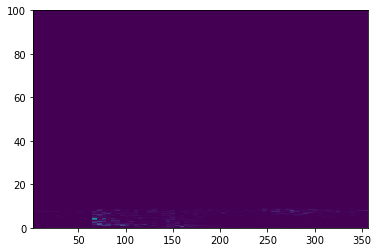

In [10]:
f, t, Sxx = signal.spectrogram(x, fs, 
                               nperseg = 1000,
                              noverlap = 30)
plt.pcolormesh(t, f, Sxx)
plt.show

In [11]:
Sxx.shape

(501, 74)

# STFT 데이터 분석

In [12]:
# for i in range(0,6):
#     dataList = os.listdir(PATH + data_list[i])
#     for j in range(0,len(dataList)):

In [13]:
dataName = []
dataLength = []
TimeFrequencyArray = []

In [14]:
for i in range(0,6):
    dataList = os.listdir(PATH + data_list[i])
    #print(len(dataList))
    for j in range(0,len(dataList)):
    #for j in range(0,len(dataList)):
        path = PATH + data_list[i] + "/" + dataList[j]
        #print(path)
        data_df = pd.read_csv(path, names=['time', '_x', '_y', '_z'],header=None, error_bad_lines=False )
        
        signals = data_df.copy()
        signals = signals.drop('time',axis=1)
        #print(signals.head(5))
        
        fs = 200
        #x =  signals['_x'][0:7200]
        x = signal.resample(signals['_x'][0:7200], 72000)
        #print(len(x))
        #x = x * pow(10,10) # 일정값 곱하기 
        
        #len_x = len(signals['_x'])
        f, t, Sxx = signal.spectrogram(x, fs, 
                               nperseg = 256,
                              noverlap = 128)
        #print(Sxx.shape)
        FrequencyArray = Sxx[:,0]
        for k in range(1, Sxx.shape[1]):
            FrequencyArray += Sxx[:,k]  
        
#         FrequencyArray = FrequencyArray.reshape(-1,1)
#         scaler.fit(FrequencyArray)
#         FrequencyArray = scaler.transform(FrequencyArray)
   

        TimeArray = Sxx[0]
        for k in range(1, Sxx.shape[0]):
            TimeArray += Sxx[k]
        
#         TimeArray = TimeArray.reshape(-1,1)
#         scaler.fit(TimeArray)
#         TimeArray = scaler.transform(TimeArray)
        
        
        #TFA = np.concatenate((FrequencyArray,TimeArray))
        TFA = np.array(TimeArray)
        
        
        dataName.append(dataList[j])
        dataLength.append(len(data_df['_x']))
        TimeFrequencyArray.append(TFA)
       

In [15]:
# f, t, Sxx = signal.spectrogram(x, fs, 
#                                nperseg = 256,
#                               noverlap = 25)

In [16]:
len(x)

72000

In [17]:
Sxx.shape

(129, 295)

<function matplotlib.pyplot.show(*args, **kw)>

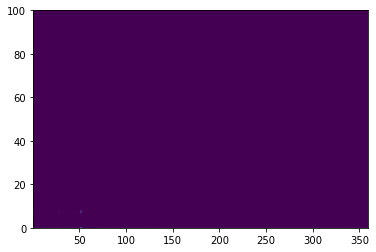

In [18]:
plt.pcolormesh(t, f, Sxx)
plt.show

In [19]:
#print(dataName)
# print(dataLength)
#print(TimeFrequencyArray)

In [20]:
NPTimeFrequencyArray= np.array(TimeFrequencyArray)
NPTimeFrequencyArray

array([[1.09268001e-12, 6.61484672e-16, 4.68428646e-16, ...,
        1.34812553e-15, 9.33055567e-16, 1.84227203e-15],
       [7.90272338e-13, 4.95964017e-16, 3.49383117e-16, ...,
        1.10166565e-15, 5.58329691e-16, 1.48067934e-15],
       [4.97537086e-13, 3.07553790e-16, 2.24052905e-16, ...,
        7.92451654e-16, 3.05900780e-16, 1.02607333e-15],
       ...,
       [3.54545298e-16, 4.59607721e-19, 6.20304379e-19, ...,
        6.31410460e-19, 6.62312899e-19, 1.30137503e-18],
       [3.73100859e-16, 3.75547113e-19, 5.26982120e-19, ...,
        5.53951982e-19, 7.14320305e-19, 1.08699504e-18],
       [4.29240290e-16, 3.11176524e-19, 4.90415621e-19, ...,
        5.85524067e-19, 7.93289465e-19, 8.61635011e-19]])

In [21]:
NPTimeFrequencyArray.shape

(21514, 295)

# dataFrame 넣기 

In [22]:
df = pd.DataFrame(NPTimeFrequencyArray)
df.shape

(21514, 295)

In [23]:
len(dataName)

21514

In [24]:
#df['dataName'] = [name.replace('.dat','') for name in dataName]
df['dataLength'] = dataLength

In [25]:
print(df.shape)
df.head(5)

(21514, 296)


,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,dataLength
0,1.092680e-12,6.614847e-16,4.684286e-16,4.778239e-16,8.330322e-16,4.576885e-16,7.554761e-16,1.070402e-15,6.361441e-16,1.325440e-15,...,3.462891e-15,2.001401e-15,9.916265e-16,8.236180e-16,1.127354e-15,1.097324e-15,1.348126e-15,9.330556e-16,1.842272e-15,8598
1,7.902723e-13,4.959640e-16,3.493831e-16,4.239287e-16,5.623356e-16,3.505079e-16,5.981053e-16,7.784442e-16,3.975694e-16,1.008600e-15,...,2.412315e-15,1.504708e-15,7.287835e-16,5.884660e-16,9.582057e-16,9.799387e-16,1.101666e-15,5.583297e-16,1.480679e-15,8598
2,4.975371e-13,3.075538e-16,2.240529e-16,3.440713e-16,3.005346e-16,2.371923e-16,4.150842e-16,4.858078e-16,2.025235e-16,6.381263e-16,...,1.307094e-15,9.381627e-16,4.378060e-16,3.542322e-16,7.097736e-16,7.908607e-16,7.924517e-16,3.059008e-16,1.026073e-15,8598
3,2.929124e-13,1.467384e-16,1.260201e-16,2.596494e-16,1.177787e-16,1.481046e-16,2.554533e-16,2.709043e-16,1.032689e-16,3.132872e-16,...,4.433721e-16,4.535718e-16,1.966612e-16,1.836793e-16,4.486251e-16,5.807531e-16,5.033372e-16,2.434070e-16,6.002653e-16,8598
4,2.312274e-13,5.660809e-17,8.155262e-17,1.932839e-16,6.303703e-17,1.071157e-16,1.619856e-16,1.913169e-16,1.264008e-16,1.211229e-16,...,5.258167e-17,1.807806e-16,6.996359e-17,1.225070e-16,2.447349e-16,4.059142e-16,3.117902e-16,3.875934e-16,3.173502e-16,8598


# 데이터 뽑기 

In [26]:
df.to_csv('NPTimeArray.csv',index=False)

In [27]:
ydata = pd.read_csv('./02_Code_ver2/01_y_data_total.csv')
#ydata = ydata[:180]
ydata

,fileName,path1_membrane_SINT,path1_bending_SINT,path2_membrane_SINT,path2_bending_SINT,path3_membrane_SINT,path3_bending_SINT,path4_membrane_SINT,path4_bending_SINT,path5_membrane_SINT,...,path10_membrane_SINT,path10_bending_SINT,path11_membrane_SINT,path11_bending_SINT,path12_membrane_SINT,path12_bending_SINT,path13_membrane_SINT,path13_bending_SINT,path14_membrane_SINT,path14_bending_SINT
0,3332325_0,4.210000e-06,1.550000e-06,6.250000e-06,6.960000e-07,3.980000e-06,1.540000e-06,1.040000e-06,1.240000e-07,0.000033,...,1.260000e-05,7.920000e-07,6.460000e-06,2.260000e-06,5.510000e-06,4.810000e-06,1.440000e-05,1.610000e-05,1.090000e-05,1.070000e-05
1,3332325_15,3.800000e-06,1.410000e-06,5.590000e-06,6.300000e-07,3.570000e-06,1.390000e-06,9.530000e-07,1.110000e-07,0.000029,...,1.120000e-05,7.030000e-07,5.780000e-06,2.030000e-06,4.960000e-06,4.330000e-06,1.300000e-05,1.440000e-05,9.850000e-06,9.630000e-06
2,3332325_30,3.280000e-06,1.220000e-06,4.830000e-06,5.390000e-07,3.080000e-06,1.190000e-06,8.230000e-07,9.400000e-08,0.000025,...,9.610000e-06,5.930000e-07,4.970000e-06,1.740000e-06,4.280000e-06,3.740000e-06,1.120000e-05,1.250000e-05,8.500000e-06,8.330000e-06
3,3332325_45,2.550000e-06,9.540000e-07,3.780000e-06,4.230000e-07,2.410000e-06,9.320000e-07,6.430000e-07,7.390000e-08,0.000020,...,7.490000e-06,4.550000e-07,3.880000e-06,1.360000e-06,3.330000e-06,2.910000e-06,8.730000e-06,9.720000e-06,6.630000e-06,6.470000e-06
4,3332325_60,2.180000e-06,8.090000e-07,3.220000e-06,3.550000e-07,2.050000e-06,7.890000e-07,5.430000e-07,6.220000e-08,0.000017,...,6.410000e-06,3.950000e-07,3.310000e-06,1.160000e-06,2.850000e-06,2.490000e-06,7.460000e-06,8.310000e-06,5.660000e-06,5.550000e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21509,10723805_30_sigma_1,1.850000e-07,6.800000e-08,2.890000e-07,2.860000e-08,1.780000e-07,6.200000e-08,4.250000e-08,4.920000e-09,0.000002,...,5.750000e-07,3.050000e-08,2.980000e-07,1.050000e-07,2.360000e-07,1.910000e-07,6.190000e-07,6.730000e-07,4.670000e-07,4.130000e-07
21510,10723805_45_sigma_1,1.500000e-07,5.490000e-08,2.340000e-07,2.310000e-08,1.440000e-07,5.010000e-08,3.430000e-08,3.980000e-09,0.000001,...,4.680000e-07,2.480000e-08,2.420000e-07,8.470000e-08,1.910000e-07,1.550000e-07,5.010000e-07,5.450000e-07,3.780000e-07,3.350000e-07
21511,10723805_60_sigma_1,1.650000e-07,5.960000e-08,2.550000e-07,2.480000e-08,1.570000e-07,5.320000e-08,3.640000e-08,4.240000e-09,0.000001,...,5.230000e-07,2.740000e-08,2.680000e-07,9.390000e-08,2.050000e-07,1.590000e-07,5.360000e-07,5.760000e-07,4.060000e-07,3.390000e-07
21512,10723805_75_sigma_1,1.950000e-07,7.100000e-08,3.040000e-07,2.990000e-08,1.870000e-07,6.380000e-08,4.360000e-08,5.120000e-09,0.000002,...,6.190000e-07,3.230000e-08,3.180000e-07,1.120000e-07,2.440000e-07,1.910000e-07,6.400000e-07,6.890000e-07,4.850000e-07,4.070000e-07


In [28]:
# frames = [df, ydata]

In [29]:
# dfMerge = pd.concat(frames, axis = 1)
# dfMerge

In [30]:
# dfMerge.drop(['fileName','dataName'],axis=1)

In [31]:
for i in range(1,15):
    frames = [df, ydata['path'+str(i)+'_membrane_SINT'],ydata['path'+str(i)+'_bending_SINT']]
    test = pd.concat(frames, axis = 1)
    test.to_csv('Time_'+'path'+str(i)+'Data.csv',index=False)
    print(test.head(5))

              0             1             2             3             4  \
0  1.092680e-12  6.614847e-16  4.684286e-16  4.778239e-16  8.330322e-16   
1  7.902723e-13  4.959640e-16  3.493831e-16  4.239287e-16  5.623356e-16   
2  4.975371e-13  3.075538e-16  2.240529e-16  3.440713e-16  3.005346e-16   
3  2.929124e-13  1.467384e-16  1.260201e-16  2.596494e-16  1.177787e-16   
4  2.312274e-13  5.660809e-17  8.155262e-17  1.932839e-16  6.303703e-17   

              5             6             7             8             9  ...  \
0  4.576885e-16  7.554761e-16  1.070402e-15  6.361441e-16  1.325440e-15  ...   
1  3.505079e-16  5.981053e-16  7.784442e-16  3.975694e-16  1.008600e-15  ...   
2  2.371923e-16  4.150842e-16  4.858078e-16  2.025235e-16  6.381263e-16  ...   
3  1.481046e-16  2.554533e-16  2.709043e-16  1.032689e-16  3.132872e-16  ...   
4  1.071157e-16  1.619856e-16  1.913169e-16  1.264008e-16  1.211229e-16  ...   

            288           289           290           291           

              0             1             2             3             4  \
0  1.092680e-12  6.614847e-16  4.684286e-16  4.778239e-16  8.330322e-16   
1  7.902723e-13  4.959640e-16  3.493831e-16  4.239287e-16  5.623356e-16   
2  4.975371e-13  3.075538e-16  2.240529e-16  3.440713e-16  3.005346e-16   
3  2.929124e-13  1.467384e-16  1.260201e-16  2.596494e-16  1.177787e-16   
4  2.312274e-13  5.660809e-17  8.155262e-17  1.932839e-16  6.303703e-17   

              5             6             7             8             9  ...  \
0  4.576885e-16  7.554761e-16  1.070402e-15  6.361441e-16  1.325440e-15  ...   
1  3.505079e-16  5.981053e-16  7.784442e-16  3.975694e-16  1.008600e-15  ...   
2  2.371923e-16  4.150842e-16  4.858078e-16  2.025235e-16  6.381263e-16  ...   
3  1.481046e-16  2.554533e-16  2.709043e-16  1.032689e-16  3.132872e-16  ...   
4  1.071157e-16  1.619856e-16  1.913169e-16  1.264008e-16  1.211229e-16  ...   

            288           289           290           291           

              0             1             2             3             4  \
0  1.092680e-12  6.614847e-16  4.684286e-16  4.778239e-16  8.330322e-16   
1  7.902723e-13  4.959640e-16  3.493831e-16  4.239287e-16  5.623356e-16   
2  4.975371e-13  3.075538e-16  2.240529e-16  3.440713e-16  3.005346e-16   
3  2.929124e-13  1.467384e-16  1.260201e-16  2.596494e-16  1.177787e-16   
4  2.312274e-13  5.660809e-17  8.155262e-17  1.932839e-16  6.303703e-17   

              5             6             7             8             9  ...  \
0  4.576885e-16  7.554761e-16  1.070402e-15  6.361441e-16  1.325440e-15  ...   
1  3.505079e-16  5.981053e-16  7.784442e-16  3.975694e-16  1.008600e-15  ...   
2  2.371923e-16  4.150842e-16  4.858078e-16  2.025235e-16  6.381263e-16  ...   
3  1.481046e-16  2.554533e-16  2.709043e-16  1.032689e-16  3.132872e-16  ...   
4  1.071157e-16  1.619856e-16  1.913169e-16  1.264008e-16  1.211229e-16  ...   

            288           289           290           291           